In [8]:
def log_metrics(X_valid, y_valid, prediction, model):
    from datetime import datetime
    date = datetime.now().strftime("%d/%m/%Y %H:%M:%S")

    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_valid, prediction, squared=True)

    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_valid, prediction ,squared=False)

    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_valid, prediction)

    from sklearn.metrics import r2_score
    r2 = r2_score(y_valid, prediction)

    #Adjusted R Squared:
    adjusted_r2 = 1-(1-r2_score(y_valid, prediction))*((len(y_valid))-1)/((len(y_valid))-len(X_valid.columns))

    log = str(date) + "  model:" + model + "\nMSE: " + str(mse) + "\nRMSE: " + str(rmse) + "\nMAE: " + str(mae) + "\nR2: " + str(r2) + "\nAdjustedR2: " + str(adjusted_r2) + "\n\n"
    with open("model_logs.txt", "a") as file_object:
        file_object.write(log)

# Classic Models

## Classic Model methods

In [ ]:
def set_data():
    import pandas as pd
    import numpy as np
    data = pd.read_csv("movie_revenue_data.csv")
    data = pd.DataFrame(data)

    years = (data["Year"]).unique()
    years.sort()
    revenues = []
    for year in (data["Year"]).unique():
        revenues.append(data[data["Year"] == year]["WorldwideBox Office"].mean())

    scaled_revenues = np.array(revenues)/1e8
    year_revenue_dict = {years[i]: scaled_revenues[i] for i in range(len(years))}
    data['Year'] = data['Year'].map(year_revenue_dict)
    data["Rating"] = data["Rating"]/10
    data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']] = np.log2(data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']])
    data=data[data["WorldwideBox Office"]>16.609640474436812].reset_index(drop=True) # movies with revenue<100.000
    data=data[data["WorldwideBox Office"]<30].reset_index(drop=True)

    import math 
    SEED = int(math.sqrt(201401004 + 191401009))

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Title','WorldwideBox Office'], axis=1), data['WorldwideBox Office'], test_size=0.10, random_state=SEED)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1111111111111111, random_state=SEED)

    from pickle import dump
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.fit_transform(X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    dump(min_max_scaler, open('MinMaxScaler.pickle', 'wb'))

    return data, X_train, X_validation, X_test, y_train, y_validation, y_test

In [ ]:
def set_data_wo_log():
    import pandas as pd
    import numpy as np
    data = pd.read_csv("movie_revenue_data.csv")
    data = pd.DataFrame(data)

    years = (data["Year"]).unique()
    years.sort()
    revenues = []
    for year in (data["Year"]).unique():
        revenues.append(data[data["Year"] == year]["WorldwideBox Office"].mean())

    scaled_revenues = np.array(revenues)/1e8
    year_revenue_dict = {years[i]: scaled_revenues[i] for i in range(len(years))}
    data['Year'] = data['Year'].map(year_revenue_dict)
    data["Rating"] = data["Rating"]/10
    data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']] = np.log2(data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']])

    data=data[data["WorldwideBox Office"]>16.609640474436812].reset_index(drop=True) # movies with revenue<100.000
    data=data[data["WorldwideBox Office"]<30].reset_index(drop=True)
    min_log_revenue = data["WorldwideBox Office"].min()
    data["WorldwideBox Office"] = 2**(data["WorldwideBox Office"] - min_log_revenue)

    import math 
    SEED = int(math.sqrt(201401004 + 191401009))

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Title','WorldwideBox Office'], axis=1), data['WorldwideBox Office'], test_size=0.10, random_state=SEED)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1111111111111111, random_state=SEED)

    from pickle import dump
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.fit_transform(X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    dump(min_max_scaler, open('MinMaxScaler.pickle', 'wb'))

    return data, X_train, X_validation, X_test, y_train, y_validation, y_test, 2**min_log_revenue

In [ ]:
def plot_pred(prediction, y_valid):
    import seaborn as sns
    import pandas as pd
    import numpy as np

    pred_data = pd.DataFrame({'normalized revenue': np.hstack((y_valid, prediction)), 'true or pred': np.hstack((["true"]*len(y_valid) , ["pred"]*len(prediction)))})
    pred_data.sort_values(by=['normalized revenue'], ascending = True, inplace = True)
    pred_data_T = pred_data[pred_data["true or pred"] == "true"]
    pred_data_T.insert(0, "plot index", list(range(len(y_valid))))
    pred_data_P = pred_data[pred_data["true or pred"] == "pred"]
    pred_data_P.insert(0, "plot index", list(range(len(y_valid))))
    plot_data = pd.concat([pred_data_T, pred_data_P])

    sns.set(rc={'figure.figsize':(50,20)})
    sns.scatterplot(data=plot_data,
                    x="plot index",
                    y="normalized revenue",
                    hue="true or pred")

In [ ]:
def plot_pred_wo_log(prediction, y_valid, y_min):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    prediction[prediction<0] = 1/y_min
    prediction = np.log2(prediction*y_min)
    y_valid = np.log2(y_valid*y_min)

    pred_data = pd.DataFrame({'normalized revenue': np.hstack((y_valid, prediction)), 'true or pred': np.hstack((["true"]*len(y_valid) , ["pred"]*len(prediction)))})
    pred_data.sort_values(by=['normalized revenue'], ascending = True, inplace = True)
    pred_data_T = pred_data[pred_data["true or pred"] == "true"]
    pred_data_T.insert(0, "plot index", list(range(len(y_valid))))
    pred_data_P = pred_data[pred_data["true or pred"] == "pred"]
    pred_data_P.insert(0, "plot index", list(range(len(y_valid))))
    plot_data = pd.concat([pred_data_T, pred_data_P])

    sns.set(rc={'figure.figsize':(50,20)})
    sns.scatterplot(data=plot_data,
                    x="plot index",
                    y="normalized revenue",
                    hue="true or pred")

## Linear regression

### Linear regression without log

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_wo_log()

try:
    import pickle
    LR = pickle.load(open('LR_without_log.pickle', 'rb'))
except:
    from sklearn.linear_model import LinearRegression
    LR = LinearRegression().fit(X_train, y_train)
    import pickle
    pickle.dump(LR, open('LR_without_log.pickle', 'wb'))

print("LinearRegression score on train:", LR.score(X_train, y_train))

LR_validation_prediction = LR.predict(X_validation)
log_metrics(X_validation, y_validation, LR_validation_prediction, "LR without log")
plot_pred_wo_log(LR_validation_prediction, y_validation, y_min)

### Linear regression with log and sample weight

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data()

try:
    import pickle
    LR = pickle.load(open('LR_with_log_and_weight.pickle', 'rb'))
except:
    from sklearn.linear_model import LinearRegression
    LR = LinearRegression().fit(X_train, y_train, sample_weight=y_train.astype(int) - y_train.astype(int).min())
    import pickle
    pickle.dump(LR, open('LR_with_log_and_weight.pickle', 'wb'))

print("LinearRegression score on train:", LR.score(X_train, y_train))

LR_validation_prediction = LR.predict(X_validation)
log_metrics(X_validation, y_validation, LR_validation_prediction, "LR with log and sample weight")
plot_pred(LR_validation_prediction, y_validation)

### Linear regression with log

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data()

try:
    import pickle
    LR = pickle.load(open('LR_with_log.pickle', 'rb'))
except:
    from sklearn.linear_model import LinearRegression
    LR = LinearRegression().fit(X_train, y_train)
    import pickle
    pickle.dump(LR, open('LR_with_log.pickle', 'wb'))

print("LinearRegression score on train:", LR.score(X_train, y_train))
log_metrics(X_validation, y_validation, LR_validation_prediction, "LR with log")
plot_pred(LR_validation_prediction, y_validation)


## Support vector regression

### Support vector regression without log

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_wo_log()

import warnings
warnings.filterwarnings("ignore")

try:
    import pickle
    SVR_grid = pickle.load(open('SVR_grid_without_log.pickle', 'rb'))
    print("tuned hpyerparameters :(best parameters) ", SVR_grid.best_params_)
    print("Support Vector Machine score on train:", SVR_grid.best_score_)
    SVR_best = SVR_grid.best_estimator_
except:
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVR
    grid = {
            'C': [0.1, 1, 10, 100],
            "kernel": ['poly', 'rbf'],
            "gamma": [0.1, 1, 5, 10],
            "degree": [2, 3, 4],
            "max_iter": [4000, 5000, 6000]
            }
    SVR = SVR()
    SVR_grid = GridSearchCV(SVR, grid, refit = True, n_jobs=-1, cv=10)
    SVR_grid.fit(X_train, y_train)
    print("tuned hpyerparameters :(best parameters) ", SVR_grid.best_params_)
    print("Support Vector Machine score on train:", SVR_grid.best_score_)
    SVR_best = SVR_grid.best_estimator_

    import pickle
    pickle.dump(SVR_grid, open('SVR_grid_without_log.pickle', 'wb'))

SVR_best_validation_prediction = SVR_best.predict(X_validation)
log_metrics(X_validation, y_validation, SVR_best_validation_prediction, "SVR without log")
plot_pred_wo_log(SVR_best_validation_prediction, y_validation, y_min)

### Support vector regression with log and sample weight

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data()

import warnings
warnings.filterwarnings("ignore")

try:
    import pickle
    SVR_grid = pickle.load(open('SVR_grid_with_log_and_weight.pickle', 'rb'))
    print("tuned hpyerparameters :(best parameters) ", SVR_grid.best_params_)
    print("Support Vector Machine score on train:", SVR_grid.best_score_)
    SVR_best = SVR_grid.best_estimator_
except:
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVR
    grid = {
            'C': [0.1, 1, 10, 100],
            "kernel": ['poly', 'rbf'],
            "gamma": [0.1, 1, 5, 10],
            "degree": [2, 3, 4],
            "max_iter": [4000, 5000, 6000]
            }
    SVR = SVR()
    SVR_grid = GridSearchCV(SVR, grid, refit = True, n_jobs=-1, cv=10)
    SVR_grid.fit(X_train, y_train, sample_weight=y_train.astype(int) - y_train.astype(int).min())
    print("tuned hpyerparameters :(best parameters) ", SVR_grid.best_params_)
    print("Support Vector Machine score on train:", SVR_grid.best_score_)
    SVR_best = SVR_grid.best_estimator_

    import pickle
    pickle.dump(SVR_grid, open('SVR_grid_with_log_and_weight.pickle', 'wb'))

SVR_best_validation_prediction = SVR_best.predict(X_validation)
log_metrics(X_validation, y_validation, SVR_best_validation_prediction, "SVR with log and sample weight")
plot_pred(SVR_best_validation_prediction, y_validation)

### Support vector regression with log

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data()

try:
    import pickle
    SVR_grid = pickle.load(open('SVR_grid_with_log.pickle', 'rb'))
    print("tuned hpyerparameters :(best parameters) ", SVR_grid.best_params_)
    print("Support Vector Machine score on train:", SVR_grid.best_score_)
    SVR_best = SVR_grid.best_estimator_
except:
    import math 
    SEED = int(math.sqrt(201401004 + 191401009))
    data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data()
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVR
    grid = {
            'C': [0.1, 1, 10, 100],
            "kernel": ['poly', 'rbf'],
            "gamma": [0.1, 1, 5, 10],
            "degree": [2, 3, 4],
            "max_iter": [4000, 5000, 6000]
            }
    SVR = SVR()
    SVR_grid = GridSearchCV(SVR, grid, refit = True, n_jobs=-1, cv=10)
    SVR_grid.fit(X_train, y_train)
    print("tuned hpyerparameters :(best parameters) ", SVR_grid.best_params_)
    print("Support Vector Machine score on train:", SVR_grid.best_score_)
    SVR_best = SVR_grid.best_estimator_

    import pickle
    pickle.dump(SVR_grid, open('SVR_grid_with_log.pickle', 'wb'))

SVR_best_validation_prediction = SVR_best.predict(X_validation)
log_metrics(X_validation, y_validation, SVR_best_validation_prediction, "SVR with log")
plot_pred(SVR_best_validation_prediction, y_validation)

## random forest regression

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data()

try:
    import pickle
    RFR_grid = pickle.load(open('RFR_grid.pickle', 'rb'))
    print("tuned hpyerparameters :(best parameters) ", RFR_grid.best_params_)
    print("RandomForestRegressor score on train:", RFR_grid.best_score_)
    RFR_best = RFR_grid.best_estimator_
except:
    try:
        import pickle
        RFR_best = pickle.load(open('best_RFR.pickle', 'rb'))
    
    except:
        import warnings
        warnings.filterwarnings("ignore")
        from sklearn.model_selection import GridSearchCV
        from sklearn.ensemble import RandomForestRegressor
        
        grid = {
                "n_estimators": [300, 400, 500],
                'max_depth': [10, 15, 20],
                "criterion": ['squared_error', 'absolute_error'],
                "max_samples": [0.5, 0.75,  1],
                "min_samples_split": [2, 4, 6],
                "max_features": [1, 3, 5, 7],
                }

        RFR = RandomForestRegressor(random_state=SEED, bootstrap=True, oob_score=True, n_jobs=-1)

        RFR_grid = GridSearchCV(RFR, grid, refit = True, n_jobs=-1, cv=10)
        RFR_grid.fit(X_train, y_train)
        print("tuned hpyerparameters :(best parameters) ", RFR_grid.best_params_)
        print("RandomForestRegressor score on train:", RFR_grid.best_score_)
        RFR_best = RFR_grid.best_estimator_
        
        import pickle
        pickle.dump(RFR_grid, open('RFR_grid.pickle', 'wb'))

RFR_best_validation_prediction = RFR_best.predict(X_validation)
log_metrics(X_validation, y_validation, RFR_best_validation_prediction, "RF with log")
plot_pred(RFR_best_validation_prediction, y_validation)

# Neural networks

## NN methods

In [1]:
def plot_pred_for_NN(prediction, y_valid):
    import seaborn as sns
    import pandas as pd
    import numpy as np

    NN_pred_data = pd.DataFrame({'normalized revenue': np.hstack((y_valid, [p[0] for p in prediction])), 'true or pred': np.hstack((["true"]*len(y_valid) , ["pred"]*len(prediction)))})
    NN_pred_data.sort_values(by=['normalized revenue'], ascending = True, inplace = True)
    NN_pred_data_T = NN_pred_data[NN_pred_data["true or pred"] == "true"]
    NN_pred_data_T.insert(0, "plot index", list(range(len(y_valid))))
    NN_pred_data_P = NN_pred_data[NN_pred_data["true or pred"] == "pred"]
    NN_pred_data_P.insert(0, "plot index", list(range(len(y_valid))))
    NN_plot_data = pd.concat([NN_pred_data_T, NN_pred_data_P])
    sns.set(rc={'figure.figsize':(50,20)})
    sns.scatterplot(data=NN_plot_data,
                    x="plot index",
                    y="normalized revenue",
                    hue="true or pred")

In [2]:
def plot_pred_for_NN_wo_log(prediction, y_valid, y_min):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    prediction = np.array([p[0] for p in prediction])
    prediction[prediction<0] = 1/y_min
    prediction = np.log2(prediction*y_min)
    y_valid = np.log2(y_valid*y_min)

    NN_pred_data = pd.DataFrame({'normalized revenue': np.hstack((y_valid, prediction)), 'true or pred': np.hstack((["true"]*len(y_valid) , ["pred"]*len(prediction)))})
    NN_pred_data.sort_values(by=['normalized revenue'], ascending = True, inplace = True)
    NN_pred_data_T = NN_pred_data[NN_pred_data["true or pred"] == "true"]
    NN_pred_data_T.insert(0, "plot index", list(range(len(y_valid))))
    NN_pred_data_P = NN_pred_data[NN_pred_data["true or pred"] == "pred"]
    NN_pred_data_P.insert(0, "plot index", list(range(len(y_valid))))
    NN_plot_data = pd.concat([NN_pred_data_T, NN_pred_data_P])
    sns.set(rc={'figure.figsize':(50,20)})
    sns.scatterplot(data=NN_plot_data,
                    x="plot index",
                    y="normalized revenue",
                    hue="true or pred")

In [3]:
def set_data_for_NN_wo_log():
    import pandas as pd
    import numpy as np
    data = pd.read_csv("movie_revenue_data.csv")
    data = pd.DataFrame(data)

    years = (data["Year"]).unique()
    years.sort()
    revenues = []
    for year in (data["Year"]).unique():
        revenues.append(data[data["Year"] == year]["WorldwideBox Office"].mean())



    scaled_revenues = np.array(revenues)/1e8
    year_revenue_dict = {years[i]: scaled_revenues[i] for i in range(len(years))}
    data['Year'] = data['Year'].map(year_revenue_dict)
    data["Rating"] = data["Rating"]/10

    data["1%"] = data["1"] / data["Votes"]
    data["2%"] = data["2"] / data["Votes"]
    data["3%"] = data["3"] / data["Votes"]
    data["4%"] = data["4"] / data["Votes"]
    data["5%"] = data["5"] / data["Votes"]
    data["6%"] = data["6"] / data["Votes"]
    data["7%"] = data["7"] / data["Votes"]
    data["8%"] = data["8"] / data["Votes"]
    data["9%"] = data["9"] / data["Votes"]
    data["10%"] = data["10"] / data["Votes"]

    data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']] = np.log2(data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']])
    data=data[data["WorldwideBox Office"]>16.609640474436812].reset_index(drop=True) # movies with revenue<100.000
    data=data[data["WorldwideBox Office"]<30].reset_index(drop=True)
    min_log_revenue = data["WorldwideBox Office"].min()
    data["WorldwideBox Office"] = 2**(data["WorldwideBox Office"] - min_log_revenue)

    import math 
    SEED = int(math.sqrt(201401004 + 191401009))

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Title','WorldwideBox Office'], axis=1), data['WorldwideBox Office'], test_size=0.10, random_state=SEED)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1111111111111111, random_state=SEED)

    from pickle import dump
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.fit_transform(X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    dump(min_max_scaler, open('MinMaxScaler.pickle', 'wb'))

    return data, X_train, X_validation, X_test, y_train, y_validation, y_test, 2**min_log_revenue

In [4]:
def set_data_for_NN():
    import pandas as pd
    import numpy as np
    data = pd.read_csv("movie_revenue_data.csv")
    data = pd.DataFrame(data)

    years = (data["Year"]).unique()
    years.sort()
    revenues = []
    for year in (data["Year"]).unique():
        revenues.append(data[data["Year"] == year]["WorldwideBox Office"].mean())



    scaled_revenues = np.array(revenues)/1e8
    year_revenue_dict = {years[i]: scaled_revenues[i] for i in range(len(years))}
    data['Year'] = data['Year'].map(year_revenue_dict)
    data["Rating"] = data["Rating"]/10

    data["1%"] = data["1"] / data["Votes"]
    data["2%"] = data["2"] / data["Votes"]
    data["3%"] = data["3"] / data["Votes"]
    data["4%"] = data["4"] / data["Votes"]
    data["5%"] = data["5"] / data["Votes"]
    data["6%"] = data["6"] / data["Votes"]
    data["7%"] = data["7"] / data["Votes"]
    data["8%"] = data["8"] / data["Votes"]
    data["9%"] = data["9"] / data["Votes"]
    data["10%"] = data["10"] / data["Votes"]

    data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']] = np.log2(data[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'WorldwideBox Office']])
    data=data[data["WorldwideBox Office"]>16.609640474436812].reset_index(drop=True) # movies with revenue<100.000
    data=data[data["WorldwideBox Office"]<30].reset_index(drop=True)
    
    import math 
    SEED = int(math.sqrt(201401004 + 191401009))

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Title','WorldwideBox Office'], axis=1), data['WorldwideBox Office'], test_size=0.10, random_state=SEED)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1111111111111111, random_state=SEED)

    from pickle import dump
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.fit_transform(X_train[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_validation[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]= min_max_scaler.transform(X_test[['Votes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
    dump(min_max_scaler, open('MinMaxScaler.pickle', 'wb'))

    return data, X_train, X_validation, X_test, y_train, y_validation, y_test

### NN template

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras;

from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input

model = Sequential([Input(shape=(13,))])
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
""" KERAS / TENSORFLOW
https://faroit.com/keras-docs/2.1.3/models/sequential/

https://faroit.com/keras-docs/2.1.3/
https://keras.io/getting_started/

https://www.tensorflow.org/api_docs/python/
https://www.tensorflow.org/
"""

""" SAVE & LOAD WEIGHTS
save_weights(
    filepath, overwrite=True, save_format=None, options=None
)

load_weights(
    filepath, by_name=False, skip_mismatch=False, options=None
)
"""

my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN.h5')
except:
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=32, workers=16)
print("validation loss, validation mae,  validation mse:", results)

NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN with log")
plot_pred_for_NN(NN_validation_prediction)

# NNs

### keras14

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN14_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN14_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=24, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN14 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint(filepath = "kerasNN14_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN14_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=24, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN14 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN14_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN14_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=24, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN14 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras16

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN16_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN16_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN16 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN16_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN16_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN16 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="tanh"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN16_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN16_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN16 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras19

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN19_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN19_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=4, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN19 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN19_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN19_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=4, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN19 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN19_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN19_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=4, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN19 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras20

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN20_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN20_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=4, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN20 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN20_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN20_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=4, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN20 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN20_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN20_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=4, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN20 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras23

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN23_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN23_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN23 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN23_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN23_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN23 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(13, activation="sigmoid"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN23_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN23_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN23 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras24

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN24_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN24_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN24 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN24_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN24_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN24 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN24_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN24_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN24 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras25

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN25_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN25_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN25 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN25_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN25_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN25 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN25_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN25_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN25 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras26

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras27

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN27_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN27_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN27 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN27_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN27_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN27 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN27_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=10, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN27_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN27 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras26-2

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26-2_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26-2_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26-2 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26-2_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26-2_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26-2 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26-2_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26-2_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26-2 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### kerasN26-3

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26-3_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.2, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26-3_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26-3 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26-3_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.2, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26-3_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26-3 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN26-3_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.2, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN26-3_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN26-3 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras27-2

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN27-2_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.25, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN27-2_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN27-2 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN27-2_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.25, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN27-2_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN27-2 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN27-2_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.25, patience=15, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN27-2_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN27-2 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras28

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN28_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=75, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.25, patience=30, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN28_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN28 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN28_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=75, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.25, patience=30, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN28_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN28 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN28_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=75, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.25, patience=30, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN28_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=7, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN28 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras29

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN29_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.2, patience=30, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN29_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN29 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"], sample_weight_mode="temporal", weighted_metrics=[])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN29_with_sample_weight.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.2, patience=30, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN29_with_sample_weight.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks, sample_weight=y_train.astype(int) - y_train.astype(int).min()+1)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN29 with log and sample weight")
plot_pred_for_NN(NN_validation_prediction, y_validation)

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test = set_data_for_NN()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.1, seed=SEED))
model.add(Dense(32, activation="tanh"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN29_with_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.2, patience=30, verbose=1, mode="auto", min_delta=0.001, cooldown=7, min_lr=0)
]
try:
    model.load_weights('kerasNN29_with_log.h5')
except:
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN29 with log")
plot_pred_for_NN(NN_validation_prediction, y_validation)

### keras 30

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN30_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN30_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=150, batch_size=24, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN30 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

### keras 31

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                768       
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)              

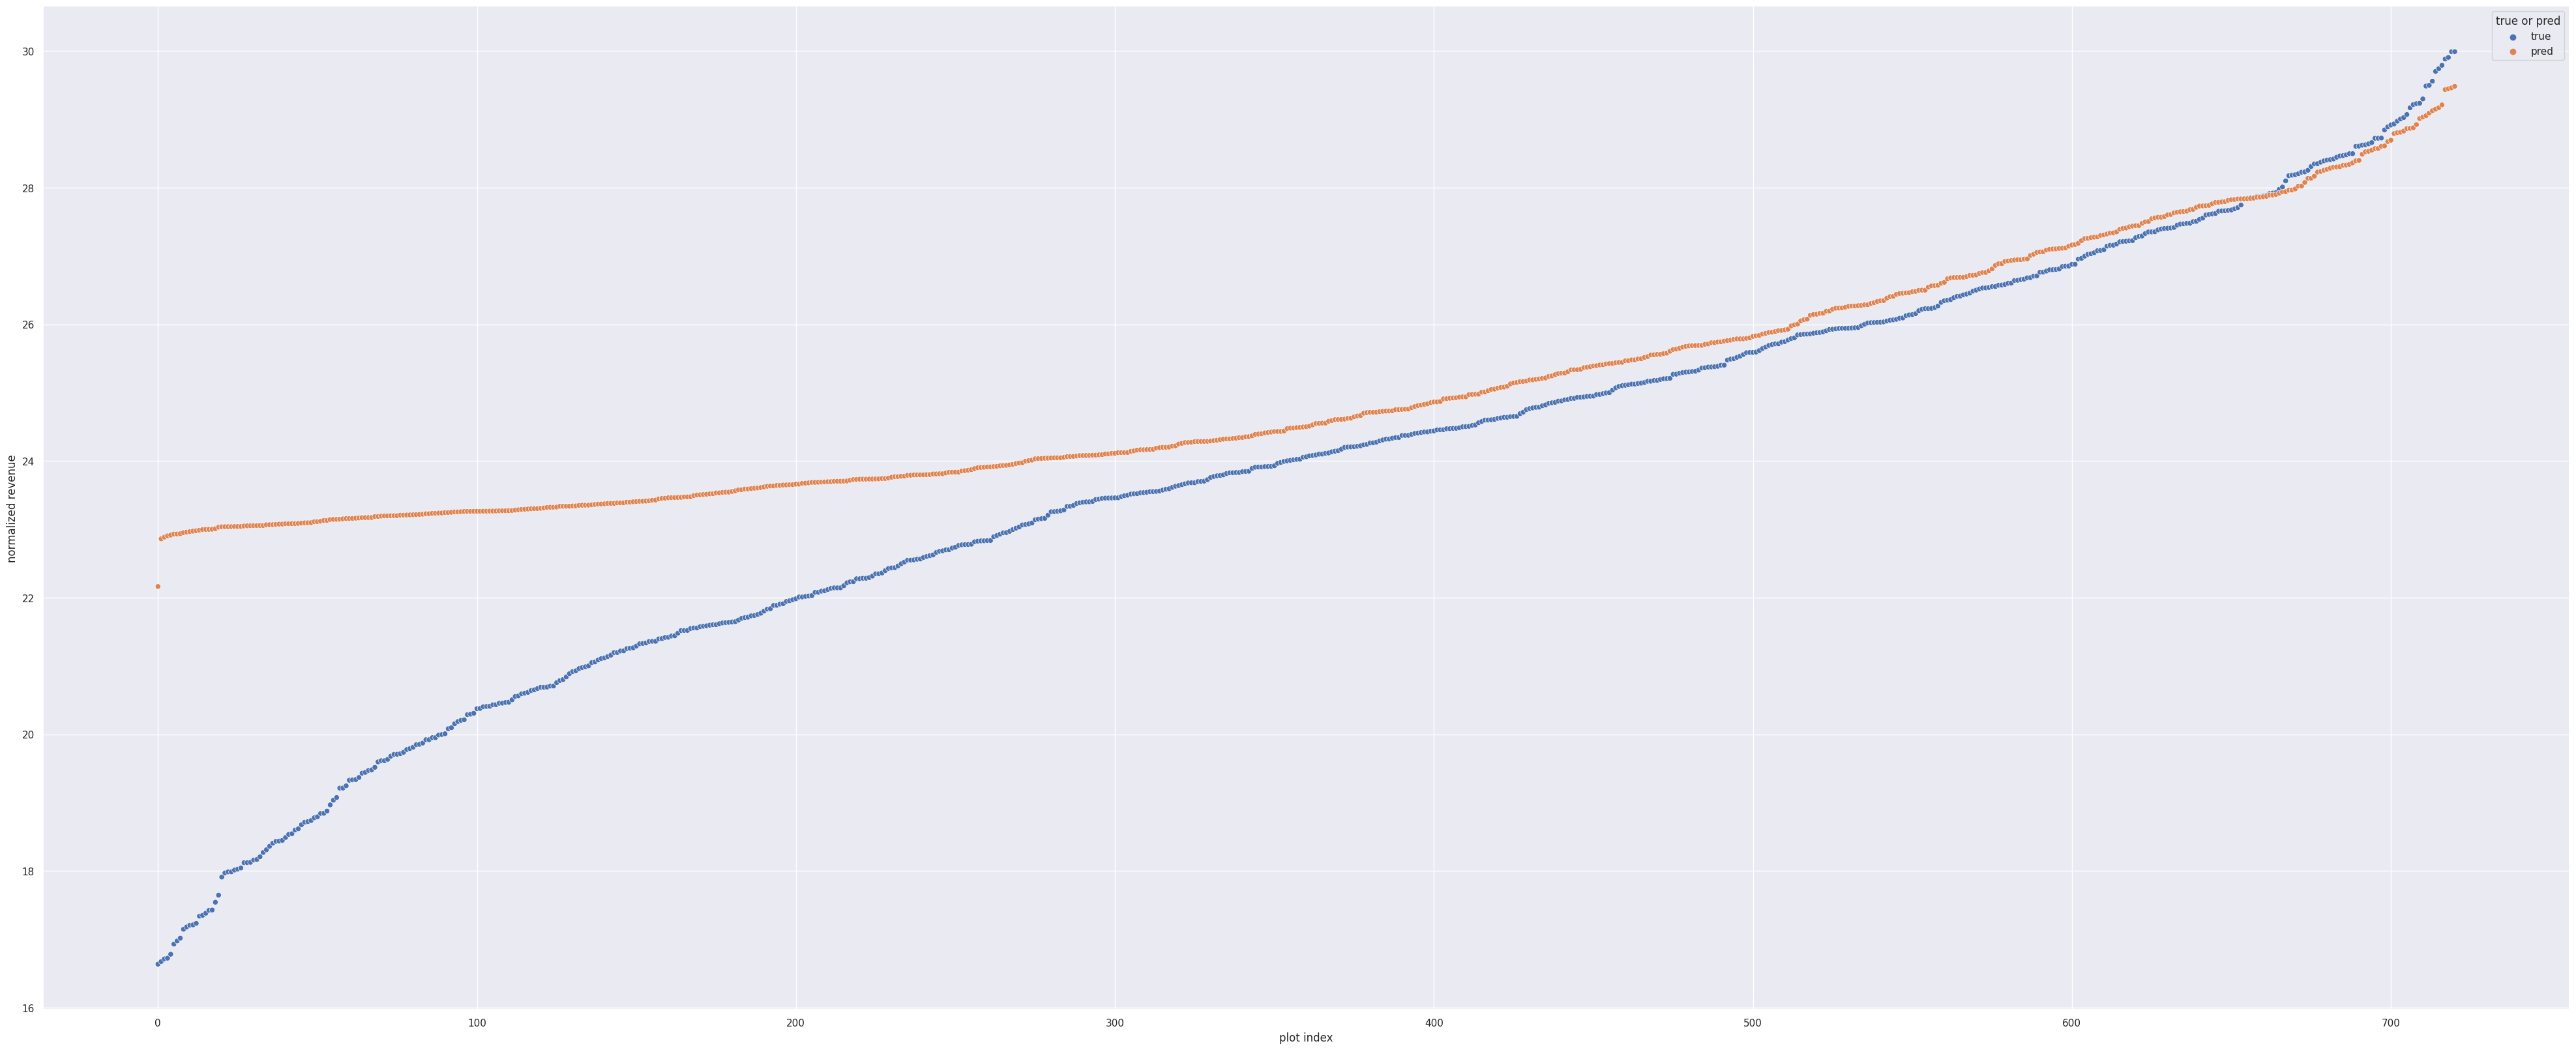

In [29]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(128, activation="tanh"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(32, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam", loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNN31_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
#tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=30, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
#tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=7, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)
]
try:
    model.load_weights('kerasNN31_wo_log.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=12, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "NN31 without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

### keras tuner1

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 32)                768       
                                                                 
 dense_103 (Dense)           (None, 96)                3168      
                                                                 
 dropout_26 (Dropout)        (None, 96)                0         
                                                                 
 dense_104 (Dense)           (None, 128)               12416     
                                                                 
 dense_105 (Dense)           (None, 192)               24768     
                                                                 
 dropout_27 (Dropout)        (None, 192)               0         
                                                                 
 dense_106 (Dense)           (None, 128)             

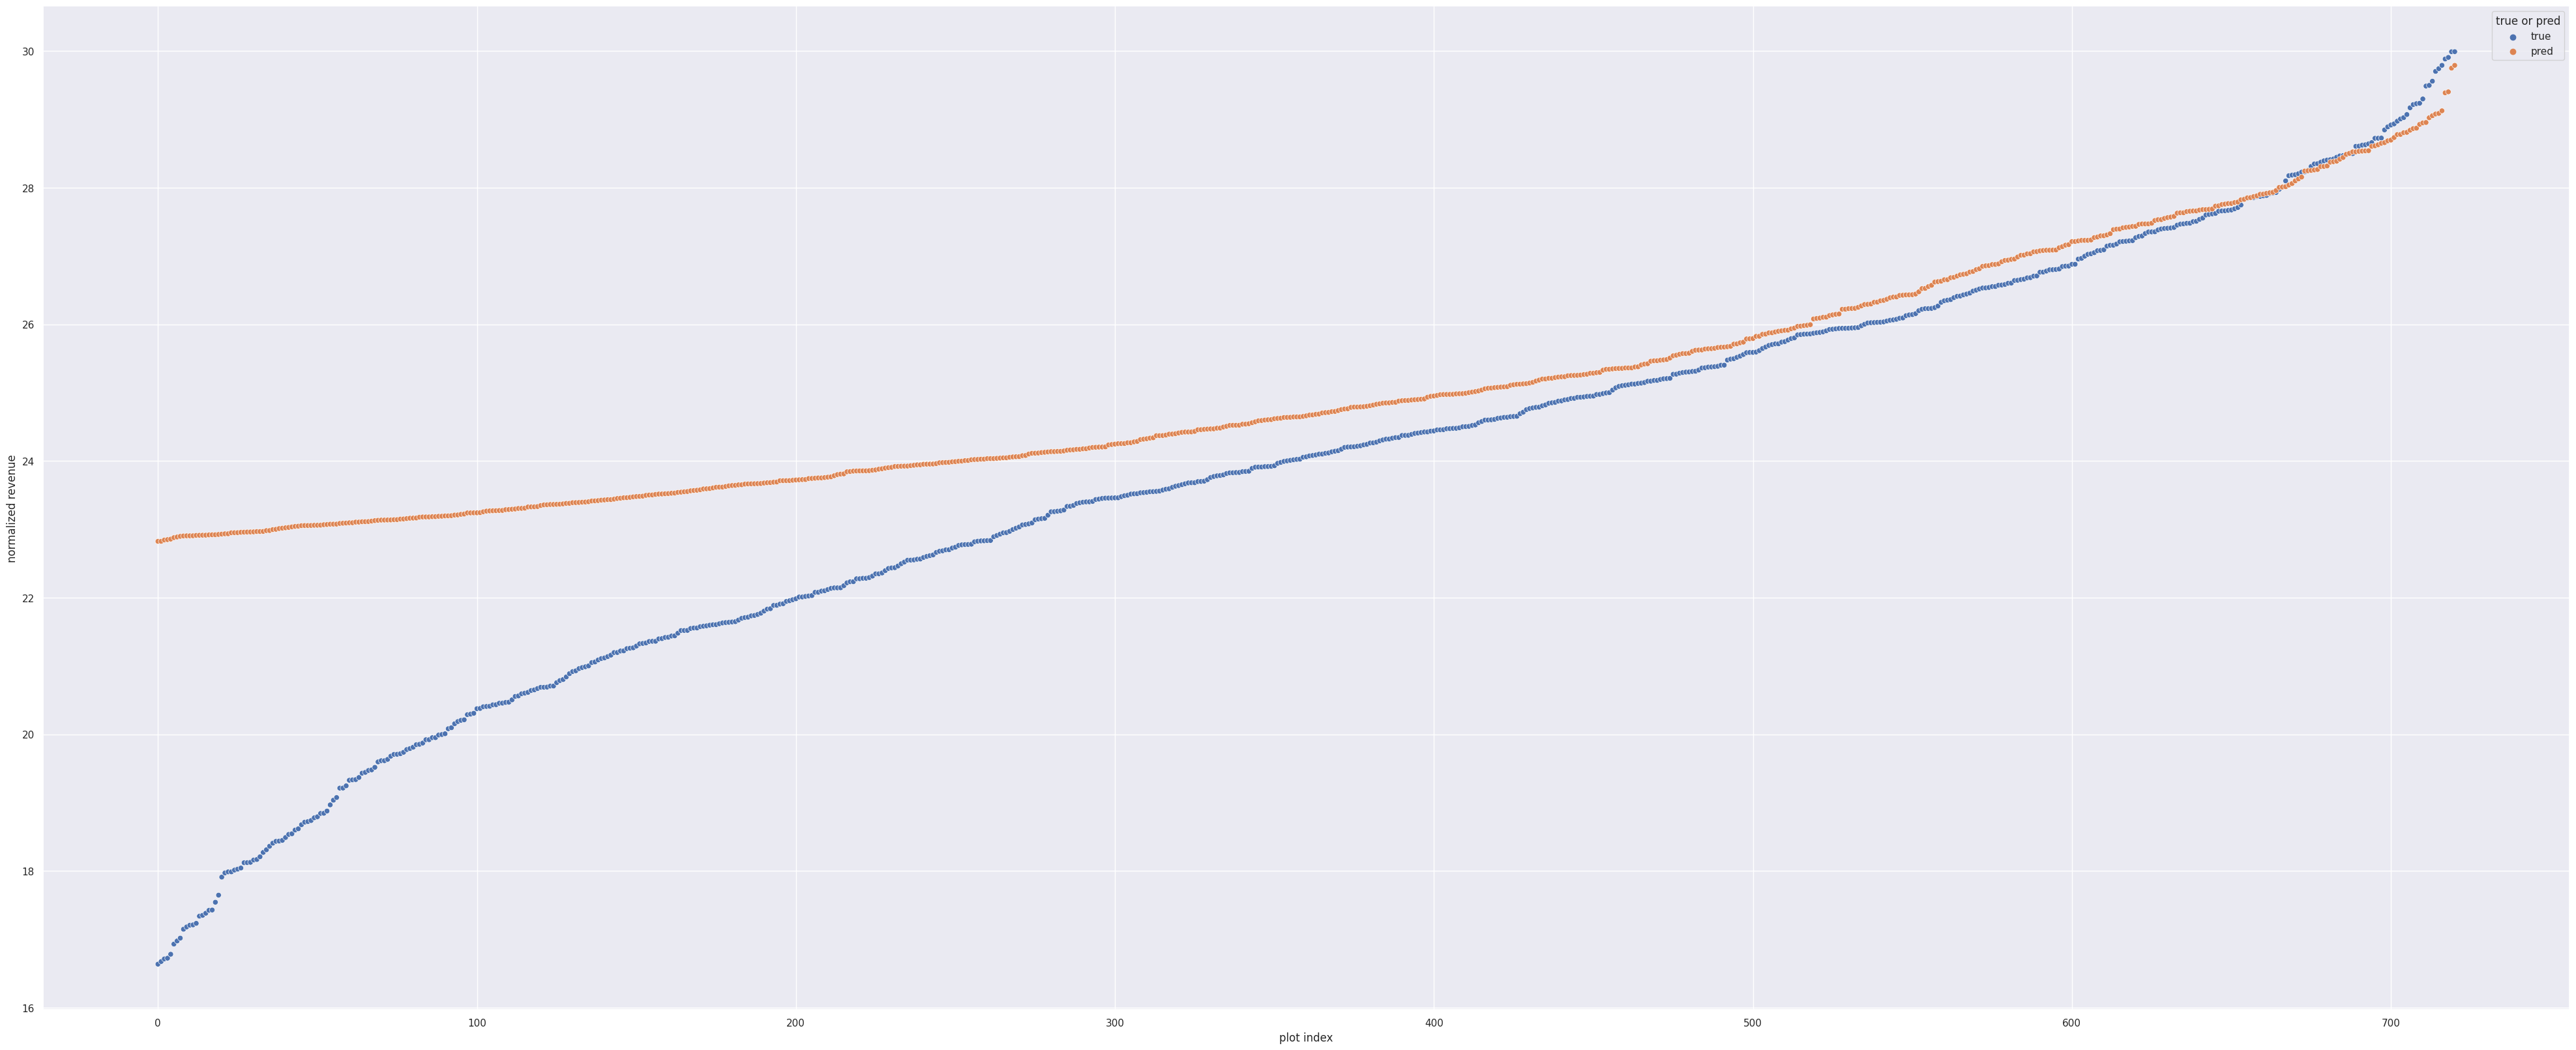

In [52]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(32, activation="relu"))
model.add(Dense(96, activation="relu"))
model.add(Dropout(0.2, seed=SEED))
model.add(Dense(128, activation="relu"))
model.add(Dense(192, activation="relu"))
model.add(Dropout(0.4, seed=SEED))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNNtuner_wo_log-001-24.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=100, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)]

try:
    model.load_weights('kerasNNtuner_wo_log-001-24.h5')
except:
    model.fit(X_train, y_train, epochs=300, batch_size=24, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=24, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "kerasNNtuner without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

# Keras-Tuner  
#### https://www.tensorflow.org/tutorials/keras/keras_tuner

In [15]:
import tensorflow
from tensorflow import keras
import keras_tuner as kt
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input

In [16]:
def model_builder(hp):
    model = Sequential([Input(shape=(23,))])

    model.add(keras.layers.Dense(units=hp.Int('hidden layer1', min_value=32, max_value=128, step=32), activation='sigmoid'))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer2', min_value=32, max_value=128, step=32), activation='tanh'))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer3', min_value=64, max_value=128, step=32), activation='relu'))
    Dropout(rate = hp.Float("dropout layer1", min_value = 0.0, max_value=0.3, step=0.1))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer4', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer5', min_value=128, max_value=265, step=32), activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer6', min_value=128, max_value=256, step=32), activation='relu'))
    Dropout(rate = hp.Float("dropout layer2", min_value = 0.0, max_value=0.3, step=0.1))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer7', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer8', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('hidden layer9', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(keras.layers.Dense(1))

    hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.05, 0.1])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss=["mse", "mae"], metrics=["mae", "mse"])
    return model
import math 
SEED = int(math.sqrt(201401004 + 191401009))
tuner = kt.Hyperband(model_builder, objective='val_loss', max_epochs=300, factor=2, seed=SEED)

In [ ]:
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNNdeepertuner_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=100, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)]

tuner.search_space_summary(extended=True)

In [ ]:
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()
tuner.search(X_train, y_train, epochs=300, validation_split=0.1, callbacks=my_callbacks)

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

print(best_hps["hidden layer1"])
print(best_hps["hidden layer2"])
print(best_hps["hidden layer3"])
print(best_hps["dropout layer1"])
print(best_hps["hidden layer4"])
print(best_hps["hidden layer5"])
print(best_hps["hidden layer6"])
print(best_hps["dropout layer2"])
print(best_hps["hidden layer7"])
print(best_hps["hidden layer8"])
print(best_hps["hidden layer9"])
print(best_hps["learning rate"])
# learning rate 0.001
# batch_size = 24

In [ ]:
import math 
SEED = int(math.sqrt(201401004 + 191401009))
data, X_train, X_validation, X_test, y_train, y_validation, y_test, y_min = set_data_for_NN_wo_log()

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras import Input
model = Sequential([Input(shape=(23,))])
model.add(Dense(hl1, activation="sigmoid"))
model.add(Dense(hl2, activation="tanh"))
model.add(Dense(hl3, activation="tanh"))
model.add(Dropout(do1, seed=SEED))
model.add(Dense(hl4, activation="relu"))
model.add(Dense(hl5, activation="relu"))
model.add(Dense(hl6, activation="relu"))
model.add(Dropout(do2, seed=SEED))
model.add(Dense(hl7, activation="relu"))
model.add(Dense(hl8, activation="relu"))
model.add(Dense(hl9, activation="relu"))
model.add(Dense(1))

# learning rates: [0.001, 0.01, 0.05, 0.1]
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=["mse", "mae"], metrics=["mae", "mse"])
model.summary()

import tensorflow
my_callbacks = [
tensorflow.keras.callbacks.ModelCheckpoint( filepath = "kerasNNtuner_wo_log.h5", monitor = "val_loss", verbose=1, save_best_only = True, save_weights_only = False, mode = "auto", save_freq = "epoch"),
tensorflow.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=100, verbose=1, mode="auto", baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.1, patience=10, verbose=1, mode="auto", min_delta=0.0001, cooldown=5, min_lr=0)]

try:
    model.load_weights('kerasNNtuner_wo_log.h5')
except:
    # batch_sizes = [8,16,24]
    model.fit(X_train, y_train, epochs=300, batch_size=24, verbose=1, validation_split=0.1, workers=16, callbacks=my_callbacks)

print("Evaluate on validation data")
results = model.evaluate(X_validation , y_validation, batch_size=12, workers=16)
print("validation loss, validation mae,  validation mse:", results)
NN_validation_prediction = model.predict(X_validation)
log_metrics(X_validation, y_validation, NN_validation_prediction, "kerasNNtuner without log")
plot_pred_for_NN_wo_log(NN_validation_prediction, y_validation, y_min)

In [ ]:
"""
Best parameters
hidden layer1: 32
hidden layer2: 96
dropout layer1: 0.1
hidden layer3: 128
hidden layer4: 192
dropout layer2: 0.30000000000000004
hidden layer5: 128
hidden layer6: 64
hidden layer7: 32
learning rate: 
"""

In [ ]:
import numpy as np
for p,y in zip([pred[0]*y_min for pred in NN_validation_prediction], y_validation*y_min):
    if abs(p-y) == abs([pred[0]*y_min for pred in NN_validation_prediction]- y_validation*y_min).max():
        print(p, y, abs(y-p), np.log2(p), np.log2(y), sep="\n")

# .